In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import norm
from scipy import stats

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("D:/python/thesis/Customer-Churn-Records.csv")
df = df.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


### 探索性数据分析

In [14]:
# 查看数据的基本信息
print(df.info())
# 查看数据的描述性统计信息
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

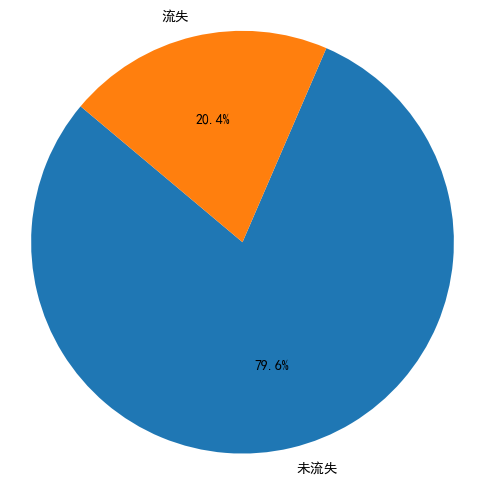

In [15]:
# 设置中文字体为黑体（SimHei），确保你的系统已安装该字体，其他如宋体（SimSun）等也可尝试
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False
# 计算流失与非流失客户的数量
churn_counts = df['Exited'].value_counts()

# 创建饼图可视化流失比例
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=['未流失', '流失'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 保证饼图是圆形
#plt.title('Customer Churn Ratio')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15464\1872619376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set1')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15464\1872619376.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HasCrCard', data=df, palette='Set1')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15464\1872619376.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsActiveMember', data=df, palette='Set1')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15

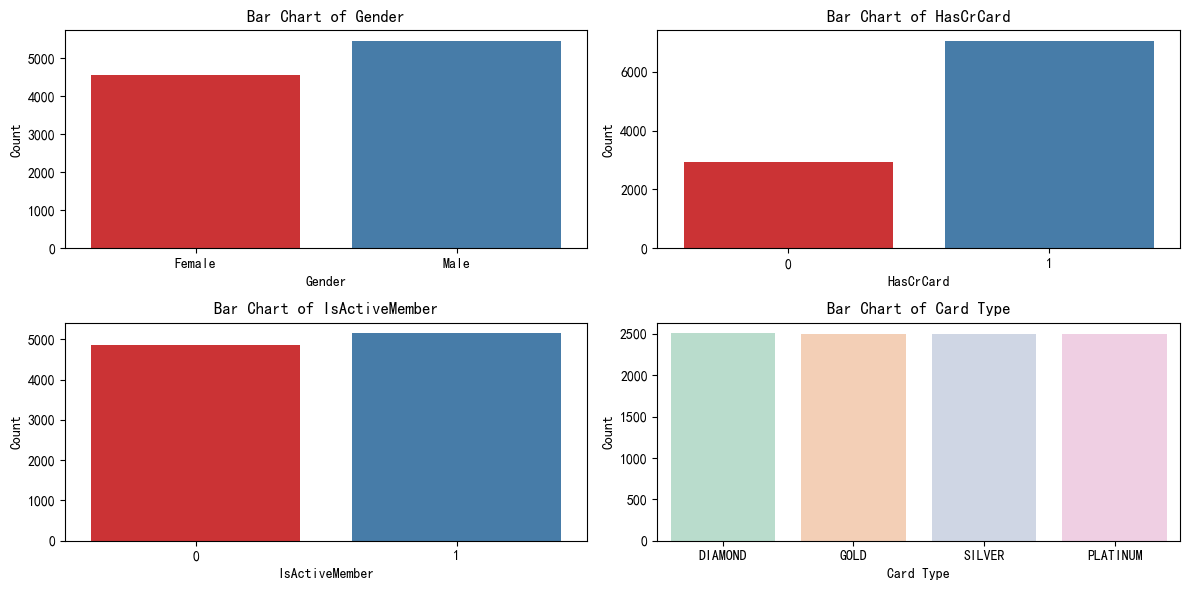

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df, palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Chart of Gender')

plt.subplot(2, 2, 2)
sns.countplot(x='HasCrCard', data=df, palette='Set1')
plt.xlabel('HasCrCard')
plt.ylabel('Count')
plt.title('Bar Chart of HasCrCard')

plt.subplot(2, 2, 3)
sns.countplot(x='IsActiveMember', data=df, palette='Set1')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.title('Bar Chart of IsActiveMember')

plt.subplot(2, 2, 4)
sns.countplot(x='Card Type', data=df, palette='Pastel2')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Bar Chart of Card Type')

plt.tight_layout()
plt.show()

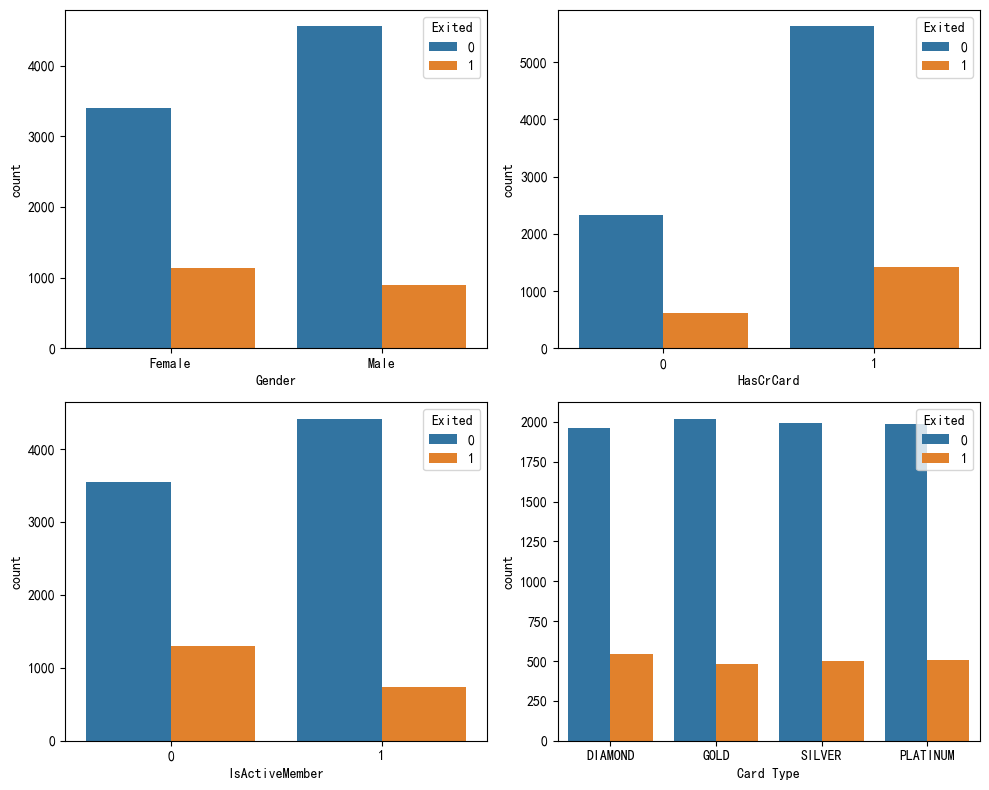

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#sns.countplot(x='Geography', hue='Exited', data=df, ax=axs[0, 0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=axs[0, 0])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axs[0, 1])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axs[1, 0])
#sns.countplot(x='Complain', hue='Exited', data=df, ax=axs[1, 1])
sns.countplot(x='Card Type', hue='Exited', data=df, ax=axs[1, 1])

plt.tight_layout()
plt.show()

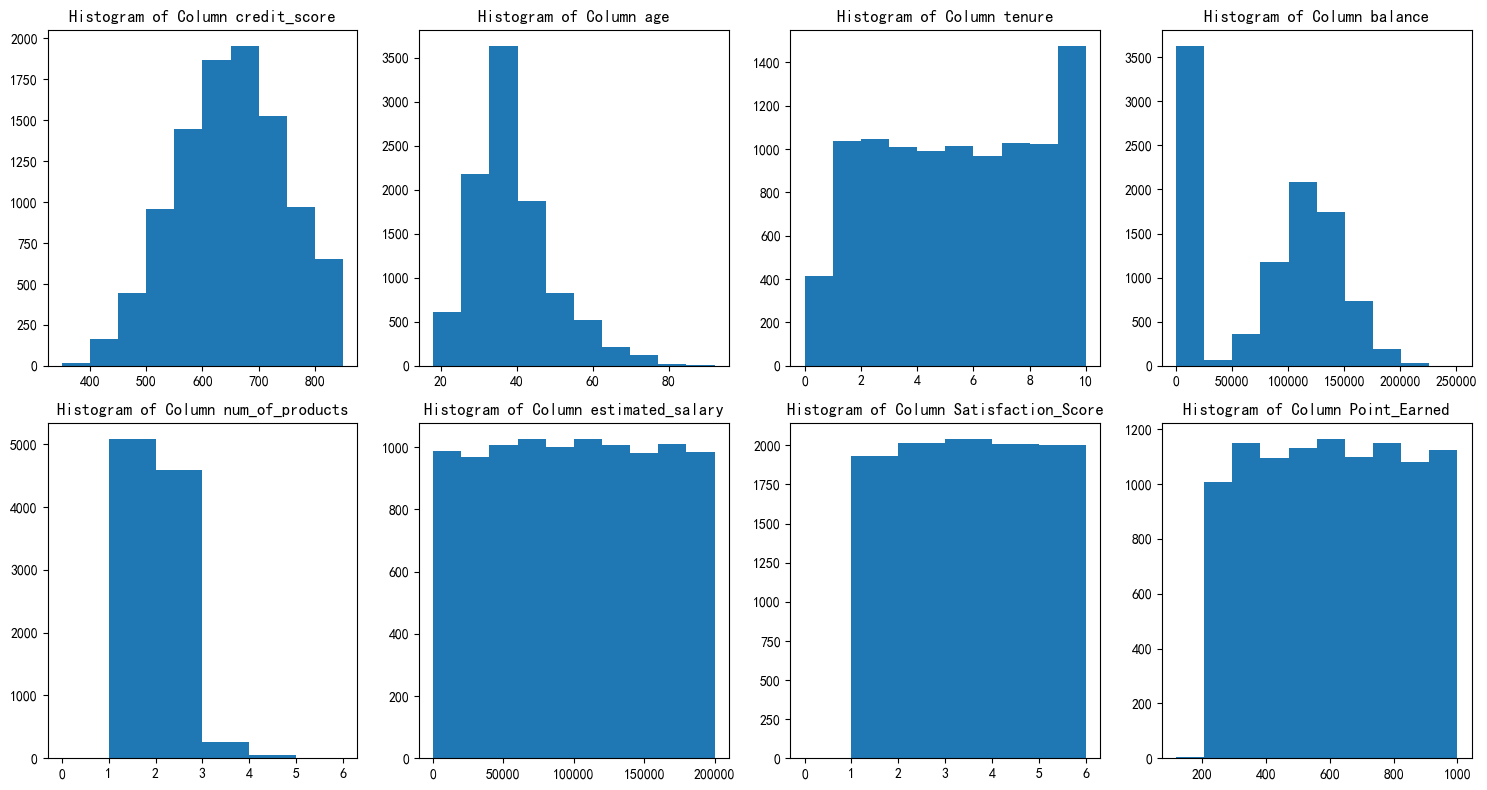

In [19]:
# 绘制直方图
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(15, 8))

axs[0, 0].set_title('Histogram of Column credit_score')
axs[0, 0].hist(df['CreditScore'])

axs[0, 1].set_title('Histogram of Column age')
axs[0, 1].hist(df['Age'])

axs[0, 2].set_title('Histogram of Column tenure')
axs[0, 2].hist(df['Tenure'])

axs[0, 3].set_title('Histogram of Column balance')
axs[0, 3].hist(df['Balance'])

axs[1, 0].set_title('Histogram of Column num_of_products')
axs[1, 0].hist(df['NumOfProducts'], bins=range(0, 7))

axs[1, 1].set_title('Histogram of Column estimated_salary')
axs[1, 1].hist(df['EstimatedSalary'])

axs[1, 2].set_title('Histogram of Column Satisfaction_Score')
axs[1, 2].hist(df['Satisfaction Score'], bins=range(0, 7))

axs[1, 3].set_title('Histogram of Column Point_Earned')
axs[1, 3].hist(df['Point Earned'])

plt.tight_layout()
plt.show()

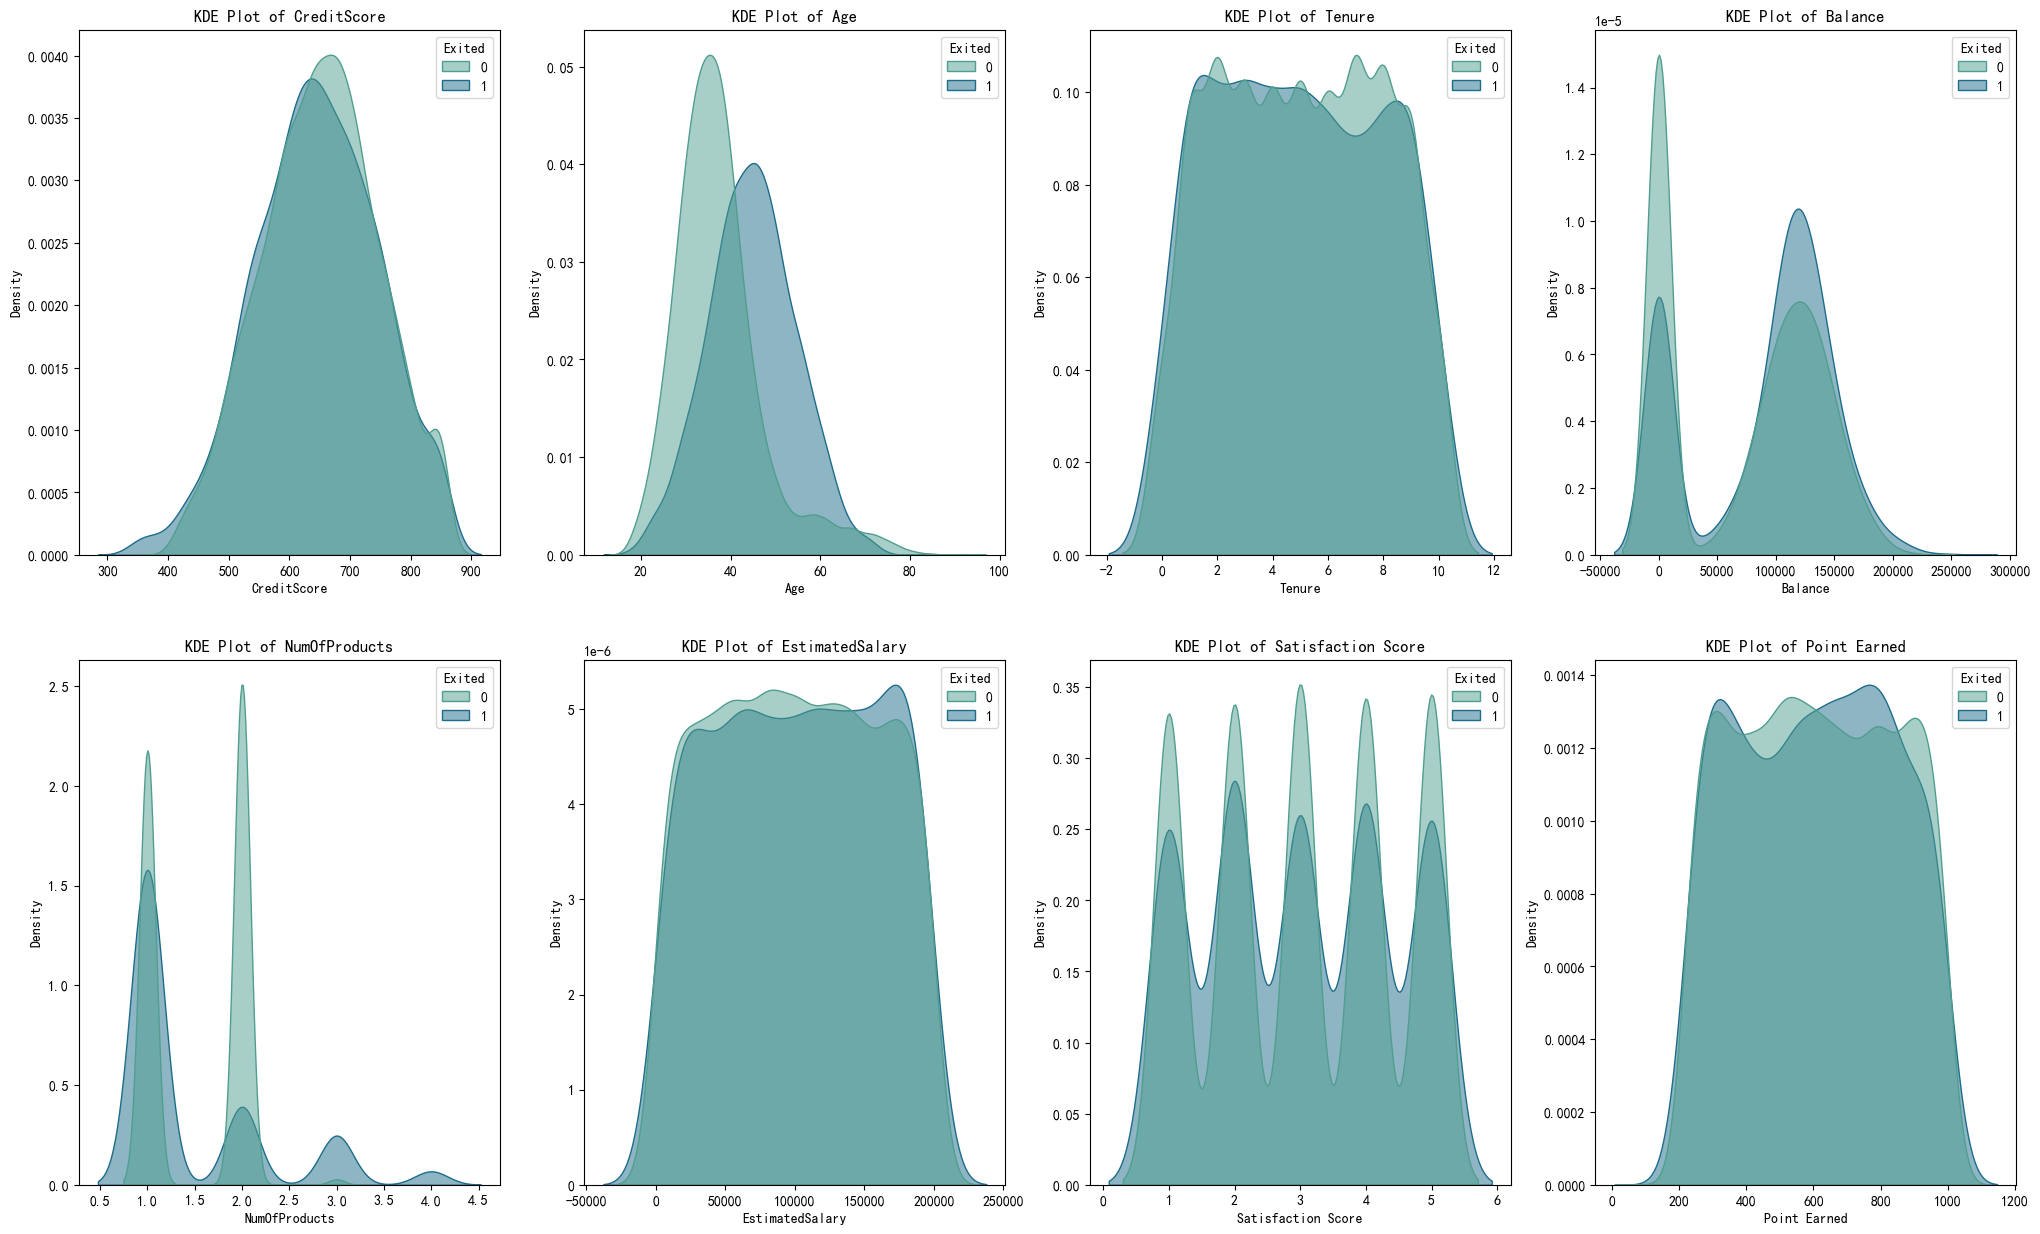

In [20]:
# 绘制分类变量的 KDE 图（多个组合）
# 定义分类变量列表
cate=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Satisfaction Score','Point Earned']

# 创建画布和坐标轴对象
fig, axs = plt.subplots(2, 4, figsize=(25, 15))

# 绘制分类变量的 KDE 图
for i, ax in enumerate(axs.flatten()):
    if i < len(cate):
        sns.kdeplot(data=df, x=cate[i], hue="Exited", fill=True, common_norm=False, palette="crest", alpha=.5, ax=ax)
        ax.set_title('KDE Plot of {}'.format(cate[i]))
        ax.set_xlabel(cate[i])
        ax.set_ylabel('Density')

plt.show()

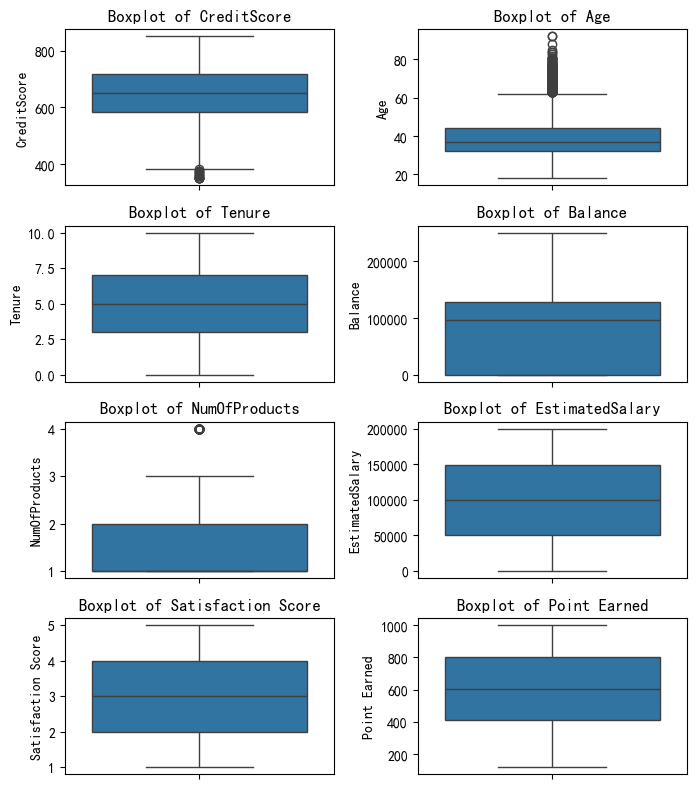

In [21]:
num=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Satisfaction Score','Point Earned']
fig, axs = plt.subplots(4,2, figsize=(7,8))
# 遍历 num 列表并绘制箱线图
for i, ax in zip(num, axs.flatten()):
    sns.boxplot(data=df[i], orient='v', ax=ax)
    ax.set_title('Boxplot of {}'.format(i))

plt.tight_layout()
plt.show()

### 特征处理

In [4]:
from sklearn.preprocessing import LabelEncoder
#对性别进行0-1编码
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

#对持有卡的种类进行有序编码
card = {'Card_Type': ['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM', 'GOLD', 'DIAMOND']}
ordem = {'DIAMOND': 4, 'GOLD': 2, 'SILVER': 1, 'PLATINUM': 3}
df['Card Type'] = df['Card Type'].map(ordem)

dummies = pd.get_dummies(df['Geography'], drop_first = True)
df = pd.concat([df, dummies], axis = 1)
df['Germany'] = LabelEncoder().fit_transform(df['Germany'])
df['Spain'] = LabelEncoder().fit_transform(df['Spain'])
df = df.drop(columns=['Geography'])

In [16]:
df1 = df.drop(['Exited','Complain'],axis = 1)

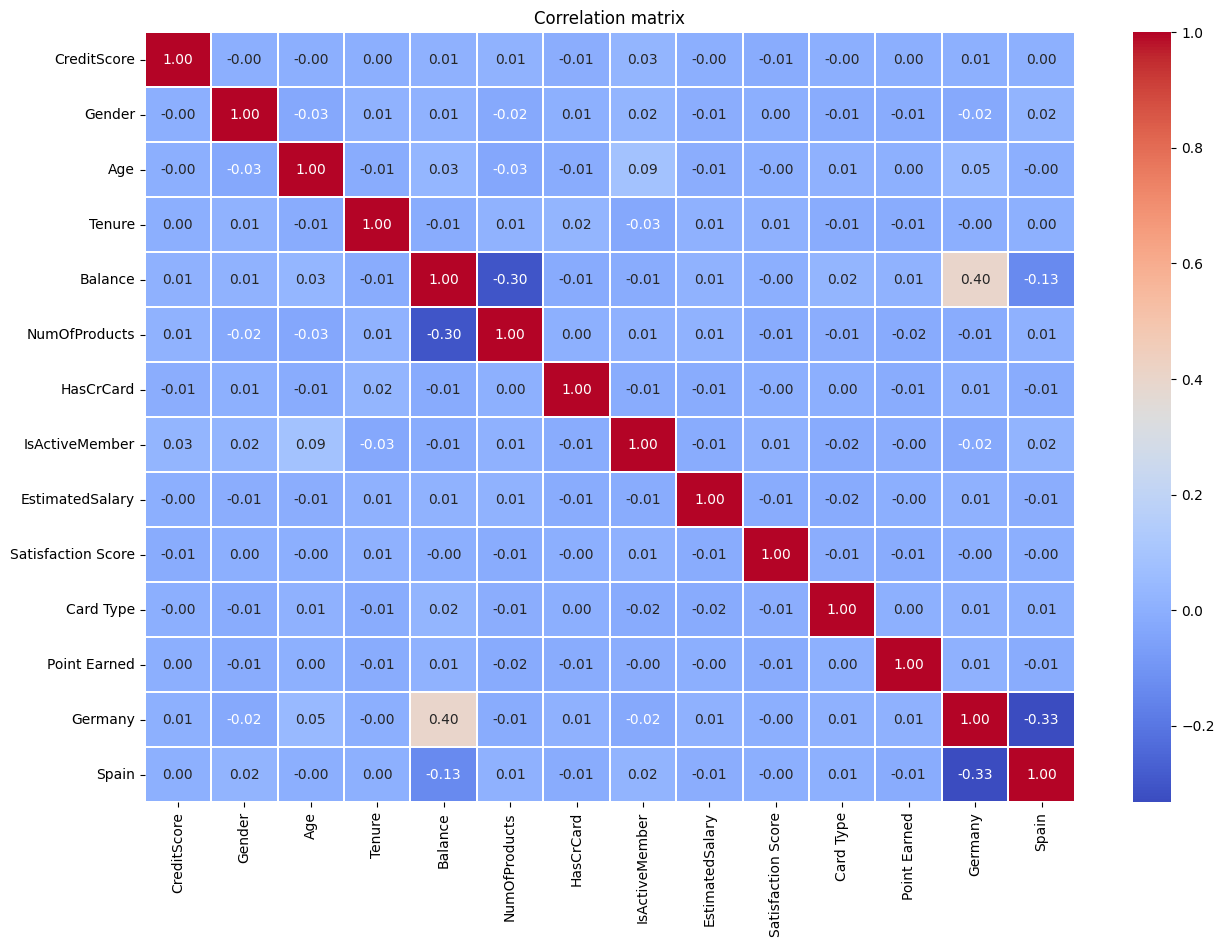

In [17]:
#Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.3)
plt.title("Correlation matrix")
plt.show()

### 建模

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import pandas as pd
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


class CustomerDataAnalysis:
    def __init__(self, data):
        self.data = data
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_data(self, columns_to_exclude=['Complain','Exited']):
        """
        准备数据，划分特征和目标变量，并进行训练集和测试集划分，
        区分哑变量和数值型变量进行标准化，并对数据进行SMOTE处理
        """
        try:
            # 划分特征和目标变量
            self.X = self.data.drop(columns_to_exclude, axis=1)
            self.y = self.data['Exited']
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

            # 区分哑变量和数值型变量
            cat_col = self.data.select_dtypes(include=['object']).columns
            num_col = self.data.select_dtypes(exclude=['object']).columns
            num_columns_list = num_col.tolist()
            num_columns_list.remove("Exited")
            num_col = pd.Index(num_columns_list)
            numerical_columns = num_col

            # 对数值型变量进行标准化
            scaler = StandardScaler()
            self.X_train[numerical_columns] = scaler.fit_transform(self.X_train[numerical_columns])
            self.X_test[numerical_columns] = scaler.transform(self.X_test[numerical_columns])

            # 使用SMOTE处理数据不平衡问题
            smote = SMOTE(random_state=42)
            self.X_train, self.y_train = smote.fit_resample(self.X_train, self.y_train)

            return self.X_train, self.X_test, self.y_train, self.y_test
        except KeyError as e:
            print(f"数据中不存在列 {e}，请检查列名是否正确。")
            raise

    def xgboost_model_grid_search(self, params):
        """
        使用传入参数对XGBoost模型进行调参，构建模型并在测试集上进行预测评估
        """
        # 创建XGBoost分类器，直接传入传入的参数params
        xgb_model = xgb.XGBClassifier(**params)

        # 在训练集上进行训练
        xgb_model.fit(self.X_train, self.y_train)

        # 在测试集上进行预测
        y_pred = xgb_model.predict(self.X_test)

        # 计算AUC得分
        auc_score = roc_auc_score(self.y_test, y_pred)

        # 输出相关信息
        print("传入参数下的XGBoost模型AUC得分:", auc_score)

        return xgb_model

    def random_forest_model_grid_search(self):
        """
        使用网格搜索法对随机森林模型进行调参，通过5折交叉验证，以AUC作为得分函数寻找最佳模型
        """
        # 定义参数网格，设置要搜索的随机森林模型参数范围
        param_grid = {
            'n_estimators': [50, 100, 150],  # 树的数量
            'max_depth': [3, 5, 7],  # 树的深度
            'min_samples_split': [2, 5, 10],  # 内部节点再划分所需最小样本数
            'min_samples_leaf': [1, 2, 4]  # 叶子节点最少样本数
        }

        # 创建随机森林分类器实例
        rf_model = RandomForestClassifier()

        # 使用网格搜索和5折交叉验证
        grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

        # 在训练集上进行网格搜索调参
        grid_search.fit(self.X_train, self.y_train)

        # 输出最佳参数组合和最佳得分
        print("最佳参数组合:", grid_search.best_params_)
        print("最佳AUC得分:", grid_search.best_score_)

        # 使用最佳参数组合构建模型并在测试集上进行预测评估（这里只是简单示例，实际可按需进一步扩展评估内容）
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(self.X_test)
        auc_score = roc_auc_score(self.y_test, y_pred)
        print("测试集上的AUC得分:", auc_score)

        return best_model


    def logistic_regression_model(self):
        """
            构建逻辑回归模型，训练并评估，这里添加正则化调参过程
        """
        # 定义正则化强度倒数C的取值范围，可根据实际情况调整范围
        C_values = [0.01, 0.1, 1, 10, 100]  # 新增：定义C值范围用于调参
        best_accuracy = 0
        best_model = None
        for C in C_values:
            try:
                # 创建逻辑回归模型，设置惩罚项为'l2'并传入当前的C值
                model = LogisticRegression(penalty='l2', C=C)  # 新增：设置正则化相关参数进行调参
                model.fit(self.X_train, self.y_train)
                y_pred = model.predict(self.X_test)
                accuracy = accuracy_score(self.y_test, y_pred)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
            except Exception as e:
                print(f"在C值为 {C} 时模型训练或预测出现异常: {e}")
        if best_model is None:
            print("没有成功训练出合适的逻辑回归模型，请检查数据和模型设置。")
            return None
        y_pred = best_model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        conf_matrix = confusion_matrix(self.y_test, y_pred)
        class_report = classification_report(self.y_test, y_pred)

        return accuracy, conf_matrix, class_report

In [28]:
# 实例化数据分析类
analysis = CustomerDataAnalysis(df)
try:
    analysis.prepare_data()
except Exception as e:
    print(f"数据准备过程出现异常: {e}")
    exit(1)

# 逻辑回归模型
logistic_accuracy, logistic_conf_matrix, logistic_class_report = analysis.logistic_regression_model()
print("逻辑回归模型准确率:", logistic_accuracy)
print("逻辑回归混淆矩阵:\n", logistic_conf_matrix)
print("逻辑回归分类报告:\n", logistic_class_report)

# 随机森林模型，使用网格搜索法调参
for _ in range(1):  # 这里只运行一次网格搜索，如果想多次尝试不同初始参数范围等可调整循环次数
    best_random_forest_model = analysis.random_forest_model_grid_search()
    # 获取预测结果用于后续评估（假设你后续可能需要更多评估指标等，可以按需扩展下面的代码）
    y_pred_rf = best_random_forest_model.predict(analysis.X_test)
    accuracy_rf = accuracy_score(analysis.y_test, y_pred_rf)
    conf_matrix_rf = confusion_matrix(analysis.y_test, y_pred_rf)
    class_report_rf = classification_report(analysis.y_test, y_pred_rf)
    print("随机森林模型（网格搜索调参后）准确率:", accuracy_rf)
    print("随机森林模型（网格搜索调参后）混淆矩阵:\n", conf_matrix_rf)
    print("随机森林模型（网格搜索调参后）分类报告:\n", class_report_rf)

# XGBoost模型，传入参数调参
params_list = [
    {'learning_rate': 0.1, 'max_depth': 3},
    {'learning_rate': 0.05, 'max_depth': 5},
    {'learning_rate': 0.01, 'max_depth': 7}
]
for params in params_list:
    xgboost_model = analysis.xgboost_model_grid_search(params)
    # 获取预测结果用于后续评估（同样可按需扩展更多评估相关代码）
    y_pred_xgb = xgboost_model.predict(analysis.X_test)
    accuracy_xgb = accuracy_score(analysis.y_test, y_pred_xgb)
    conf_matrix_xgb = confusion_matrix(analysis.y_test, y_pred_xgb)
    class_report_xgb = classification_report(analysis.y_test, y_pred_xgb)
    print(f"XGBoost模型（参数为 {params}）准确率:", accuracy_xgb)
    print(f"XGBoost模型（参数为 {params}）混淆矩阵:\n", conf_matrix_xgb)
    print(f"XGBoost模型（参数为 {params}）分类报告:\n", class_report_xgb)

数据中不存在列 "['Complain'] not in index"，请检查列名是否正确。
数据准备过程出现异常: "['Complain'] not in index"


D:\anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

逻辑回归模型准确率: 0.8015
逻辑回归混淆矩阵:
 [[1570   37]
 [ 360   33]]
逻辑回归分类报告:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.47      0.08      0.14       393

    accuracy                           0.80      2000
   macro avg       0.64      0.53      0.52      2000
weighted avg       0.75      0.80      0.74      2000

最佳参数组合: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
最佳AUC得分: 0.8541325189700567
测试集上的AUC得分: 0.6666049139341083
随机森林模型（网格搜索调参后）准确率: 0.855
随机森林模型（网格搜索调参后）混淆矩阵:
 [[1570   37]
 [ 253  140]]
随机森林模型（网格搜索调参后）分类报告:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.79      0.36      0.49       393

    accuracy                           0.85      2000
   macro avg       0.83      0.67      0.70      2000
weighted avg       0.85      0.85      0.83      2000

传入参数下的XGBoost模型AUC得分: 0.71353

In [29]:
import shap

def plot_shap_for_specific_xgboost_result(analysis, specific_params):
    """
    针对特定参数的XGBoost模型结果，绘制整体的SHAP图（使用summary_plot展示所有样本整体情况）
    :param analysis: CustomerDataAnalysis类的实例对象，包含了数据及相关处理方法
    :param specific_params: 指定的XGBoost模型参数，字典形式
    """
    # 使用特定参数构建并训练XGBoost模型
    xgboost_model = analysis.xgboost_model_grid_search(specific_params)

    explainer = shap.TreeExplainer(xgboost_model)
    shap_values = explainer.shap_values(analysis.X_test)

    # 绘制特征重要性概览图（summary_plot）展示所有样本整体情况
    shap.summary_plot(shap_values, analysis.X_test)
    #plt.title("Feature Importance Summary Plot for All Samples")
    plt.tight_layout()  # 添加这一行，自动调整布局
    plt.show()

数据中不存在列 "['Complain'] not in index"，请检查列名是否正确。
数据准备过程出现异常: "['Complain'] not in index"
传入参数下的XGBoost模型AUC得分: 0.7119504204727726


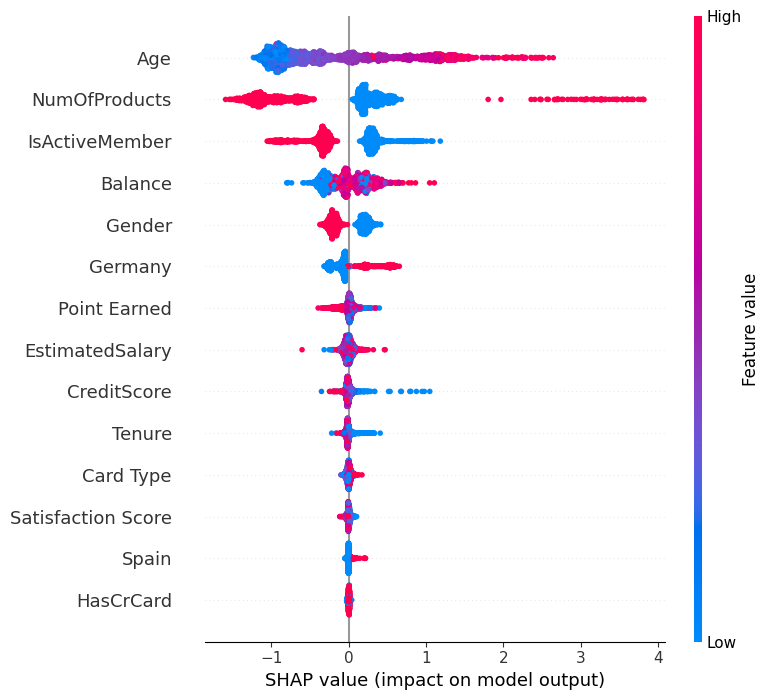

<Figure size 640x480 with 0 Axes>

In [30]:
# 实例化数据分析类
analysis = CustomerDataAnalysis(df)
try:
    analysis.prepare_data()
except Exception as e:
    print(f"数据准备过程出现异常: {e}")
    exit(1)

# 指定的XGBoost模型参数
specific_params = {'learning_rate': 0.05, 'max_depth': 5}

# 调用函数绘制特定参数的XGBoost模型对应的整体SHAP图
plot_shap_for_specific_xgboost_result(analysis, specific_params)